In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')


In [4]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [5]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [6]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240517_132125"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240517_132125/ds_sub_fit/sub_fit_ho.
2024-05-17 13:21:26,650	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6. Best iteration is:
	[6]	valid_set's l2: 0.00162837	valid_set's r2: -81.8945
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00233238	valid_set's r2: -89.1303
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00241762	valid_set's r2: -91.5808
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best itera

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00171007	valid_set's r2: -80.9172
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best iteration is:
	[2]	valid_set's l2: 0.00204749	valid_set's r2: -85.978
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239913	valid_set's r2: -90.4574
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0025924	valid_set's r2: -93.8796
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteratio

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12.
	Ran out of time, early stopping on iteration 15.
	Ran out of time, early stopping on iteration 16.
	Ran out of time, early stopping on iteration 17.
	Ran out of time, early stopping on iteration 17.
	Ran out of time, early stopping on iteration 19.
	Ran out of time, early stopping on iteration 20.
	Ran out of time, early stopping on iteration 25.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.6994	 = Validation score   (r2)
	75.57s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 84.27s of the 8682.97s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 84.27s of the 8578.76s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00202272	valid_set's r2: -85.4377
	Time limit exceeded... Skipping LightGBMLarge_BAG_L1.
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tun

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239376	valid_set's r2: -91.0399
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00231007	valid_set's r2: -89.7062
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239428	valid_set's r2: -91.1652
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258212	valid_set's r2: -94.0909
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning LightGBMXT_BAG_L2... Skipping this model.
Hyperparameter tu

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238862	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00230335	valid_set's r2: -89.4291
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238888	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258147	valid_set's r2: -94.0909
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning LightGBM_BAG_L2... Skipping this model.
Hyperparameter tuni

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 12.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 17.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.2912	 = Validation score   (r2)
	62.95s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 72.55s of the 4686.72s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/auto

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 72.55s of the 4575.75s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00247535	valid_set's r2: -94.012
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 72.55s of the 4559.67s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 52. Best iteration is:
	[52]	valid_set's l2: 0.000376001	valid_set's r2: -81.2983
	Ran out of time, early stopping on iteration 56. Best iteration is:
	[56]	valid_set's l2: 0.000374053	valid_set's r2: -81.0421
	Ran out of time, early stopping on iteration 56. Best iteration is:
	[50]	valid_set's l2: 0.000383685	valid_set's r2: -81.8293
	Ran out of time, early stopping on iteration 59. Best iteration is:
	[59]	valid_set's l2: 0.000366943	valid_set's r2: -81.6436
	Ran out of time, early stopping on iteration 62. Best iteration is:
	[61]	valid_set's l2: 0.000368327	valid_set's r2: -80.9705
	Ran out of time, early stopping on iteration 66. Best iteration is:
	[62]	valid_set's l2: 0.000363417	valid_set's r2: -81.4569
	Ran out of time, early stopping on iteration 73. Best iteration is:
	[72]	valid_set's l2: 0.000362525	valid_set's r2: -81.012
	Ran out of time,

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	197.89s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 267.85s of the 28101.95s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 512, in validate_search_space
    raise EmptySearchSpace
autogluon.core.hpo.exceptions.EmptySearchSpace

During handling of the above exception, ano

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 57.
	Ran out of time, early stopping on iteration 57.
	Ran out of time, early stopping on iteration 65.
	Ran out of time, early stopping on iteration 68.
	Ran out of time, early stopping on iteration 69.
	Ran out of time, early stopping on iteration 75.
	Ran out of time, early stopping on iteration 84.
	Ran out of time, early stopping on iteration 102.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8634	 = Validation score   (r2)
	250.32s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 267.85s of the 27792.06s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8669	 = Validation score   (r2)
	271

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8058	 = Validation score   (r2)
	254.46s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 267.85s of the 27259.57s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 34. Best iteration is:
	[20]	valid_set's l2: 0.00100763	valid_set's r2: -81.274
	Ran out of time, early stopping on iteration 35. Best iteration is:
	[20]	valid_set's l2: 0.00101238	valid_set's r2: -81.0178
	Ran out of time, early stopping on iteration 37. Best iteration is:
	[21]	valid_set's l2: 0.000968571	valid_set's r2: -81.7855
	Ran out of time, early stopping on iteration 38. Best iteration is:
	[20]	valid_set's l2: 0.00100549	valid_set's r2: -81.6237
	Ran out of time, early stopping on it

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Best iteration is:
	[3]	valid_set's l2: 0.0020198	valid_set's r2: -84.954
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.000975965	valid_set's r2: -81.1281
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.0017168	valid_set's r2: -81.799
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258245	valid_set's r2: -93.9617
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.0010769	valid_set's r2: -81.071
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00116352	valid_set's r2: -81.2255
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4. Best iteration is:
	[4]	valid_set's l2: 0.00184799	valid_set's r2: -83.1047
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0025819	valid_set's r2: -93.9617
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterati

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 23.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 22.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 10.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 11.
	Ran out of time, early stopping on iteration 12.
	Ran out of time, early stopping on iteration 12.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 15.
	Ran out of time, early stopping on iteration 15.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T4 ...
	0.2396	 = Validation s

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 214.16s of the 13634.57s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 10. Best iteration is:
	[10]	valid_set's l2: 0.00157492	valid_set's r2: -81.3236
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ...

In [7]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

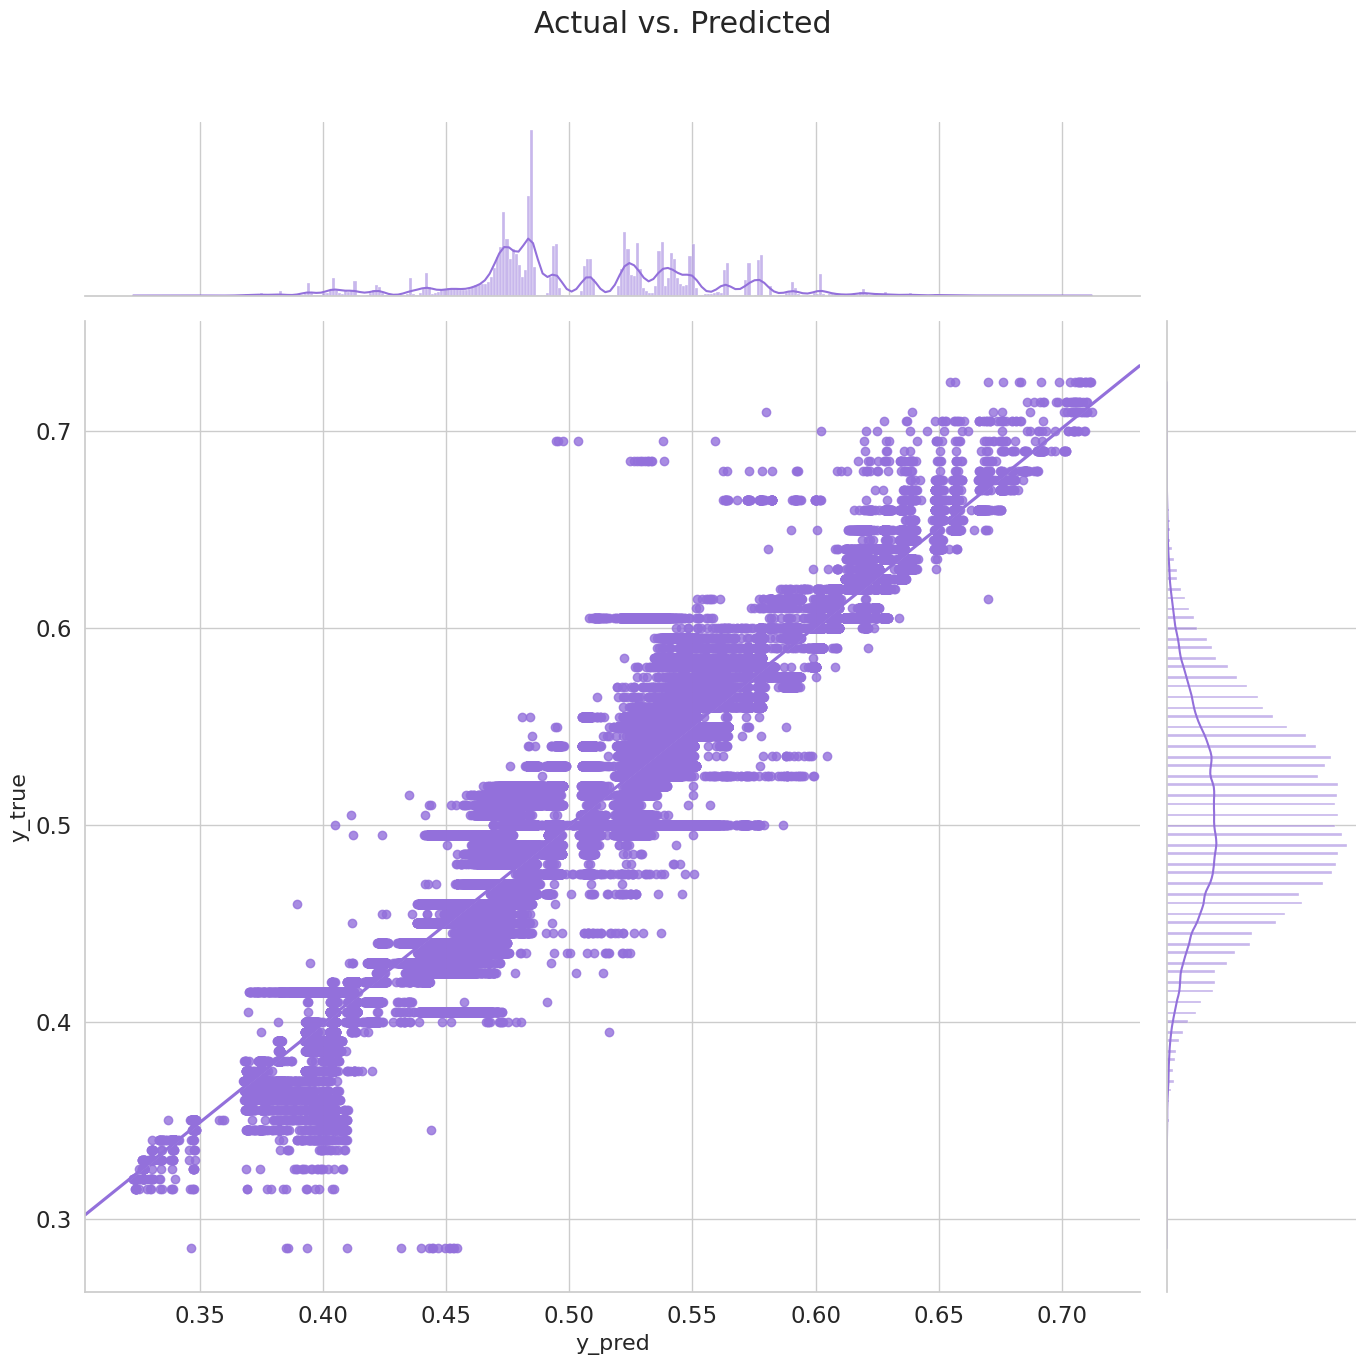

In [8]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [9]:
score = predictor.evaluate(_val, silent=True)['r2']

In [10]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8693427905829814


In [11]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_0', '_sort_19', '_50th', '_cnt18', '_cnt19', '_cnt22']


In [12]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.869343,0.869229,r2,99.303930,2.387197,12339.955087,0.007750,0.020785,7.708919,3,True,51
1,XGBoost_r194_BAG_L1,0.869238,0.869121,r2,1.176126,0.004598,255.143286,1.176126,0.004598,255.143286,1,True,19
2,CatBoost_r6_BAG_L2,0.869034,0.868807,r2,99.296180,2.366412,12332.246168,0.819514,0.004278,205.034388,2,True,50
3,ExtraTrees_r42_BAG_L1,0.868463,0.867114,r2,0.819168,0.003148,277.996147,0.819168,0.003148,277.996147,1,True,12
4,ExtraTreesMSE_BAG_L1,0.868290,0.866859,r2,0.615393,0.003180,271.445680,0.615393,0.003180,271.445680,1,True,4
5,CatBoost_r6_BAG_L1,0.868032,0.868076,r2,1.333157,0.004501,253.820335,1.333157,0.004501,253.820335,1,True,41
6,ExtraTrees_r178_BAG_L1,0.867989,0.866212,r2,1.589303,0.003225,289.232380,1.589303,0.003225,289.232380,1,True,36
7,CatBoost_r180_BAG_L1,0.867931,0.867845,r2,0.955068,0.004575,253.196580,0.955068,0.004575,253.196580,1,True,43
8,CatBoost_r163_BAG_L1,0.867882,0.867939,r2,0.351710,0.004236,253.543889,0.351710,0.004236,253.543889,1,True,45
9,CatBoost_r167_BAG_L1,0.867841,0.867902,r2,0.504967,0.004412,253.400004,0.504967,0.004412,253.400004,1,True,24


In [13]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,1.051774,0.012228,0.000000,5,1.076952,1.026595
_mean,0.010908,0.000456,0.000000,5,0.011848,0.009968
_sum_log,0.009462,0.000350,0.000000,5,0.010183,0.008741
_entropy,0.002039,0.000332,0.000081,5,0.002722,0.001355
_special1,0.000903,0.000164,0.000124,5,0.001241,0.000566
_max,0.000883,0.000260,0.000805,5,0.001418,0.000348
_cnt15,0.000402,0.000159,0.002421,5,0.000729,0.000074
_2nd_moment,0.000355,0.000177,0.005522,5,0.000720,-0.000010
_skew,0.000243,0.000156,0.012669,5,0.000566,-0.000079
_gmean,0.000233,0.000203,0.031056,5,0.000651,-0.000185


# Making Predictions and Creating a Submission File

In [14]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = TabularDataset(test)

preds = predictor.predict(test)

In [15]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.577816
1117958,1117958,0.455676
1117959,1117959,0.446664
1117960,1117960,0.466414
1117961,1117961,0.467737


In [16]:
shutil.rmtree("AutogluonModels")